# Heart Disease Classification

##### Prepared by: Rania Almneie - Hanadi Alshahrani - Najd Alqahtani

### Goal:

Predict whether the patient has heart disease or not, This is a binary result.
We will experiment with different classification models and see which one yields the most accuracy.

### Question:

Can  a  classification  model  predict  whether  the  patient  has  heart
disease or not ?

### Data Description:

The dataset was downloaded from the Kaggle website and consisted
of 1026 observations. The predictor Y (Positive or Negative diagnosis
of Heart Disease) is determined by 14 features (X):

* age: age in years
* sex: male, female
* cp: chest pain type
* trestbps: resting blood pressure
* chol: serum cholesterol
* fbs: fasting blood sugar
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels
* thal: number of defect type
* target: disease, no disease.    


### Tools :

* Pandas
* NumPy
* Sklearn
* SQLAlchemy
* seaborn
* matplotlib
* Ploty
* Heroku
* Flask

#### Importing Libraries : To import necessary libraries

In [340]:
#For data manipulation
import pandas as pd
import numpy as np

#For plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#For modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import plotly.express as px
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree


#For store dataset into database
from sqlalchemy import *

#For inserting images
from IPython.display import Image

#For warning
import warnings
warnings.filterwarnings("ignore")


## 1-Read heart disease dataset

In [256]:
df=pd.read_csv('heart_Disease_Dataset.csv')

In [257]:
engine=create_engine('sqlite:///HD.db')
df.to_sql('HD_data',engine,if_exists='replace',index=False)

In [258]:
#To check if the HD_data table existing
tables=engine.table_names()
print(tables);

['HD_data']


In [259]:
df=pd.read_sql('select * from HD_data',engine)
df.shape

(1025, 14)

In [260]:
#To check the type of df
type(df)

pandas.core.frame.DataFrame

In [261]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### 2-EDA

In [262]:
#To see the shape of df
df.shape

(1025, 14)

The dataset contain 1025 rows and 14 columns.

Let’s take a look at what the dataset actually looks like

In [263]:
#To display the first 5 rows :
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [264]:
#To take a sample from df
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
656,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
209,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
333,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
355,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
426,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1


In [265]:
#To check missings with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [266]:
#check missings with .isna() then apply sum()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- As the result showed, there are no missing values.

- To see statistical details of the dataset, we can use df.describe()

In [267]:
#To describe the numerical data (count,mean,std,min,25%,50%,75%,max)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [268]:
# To see the target mean with all feature
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [269]:
# To see the value count of target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [270]:
# To see percentage of patients Have Heart Disease and not
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [271]:
# To see the percentage of female and male patients
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


### Plotting :

* Pair plot :

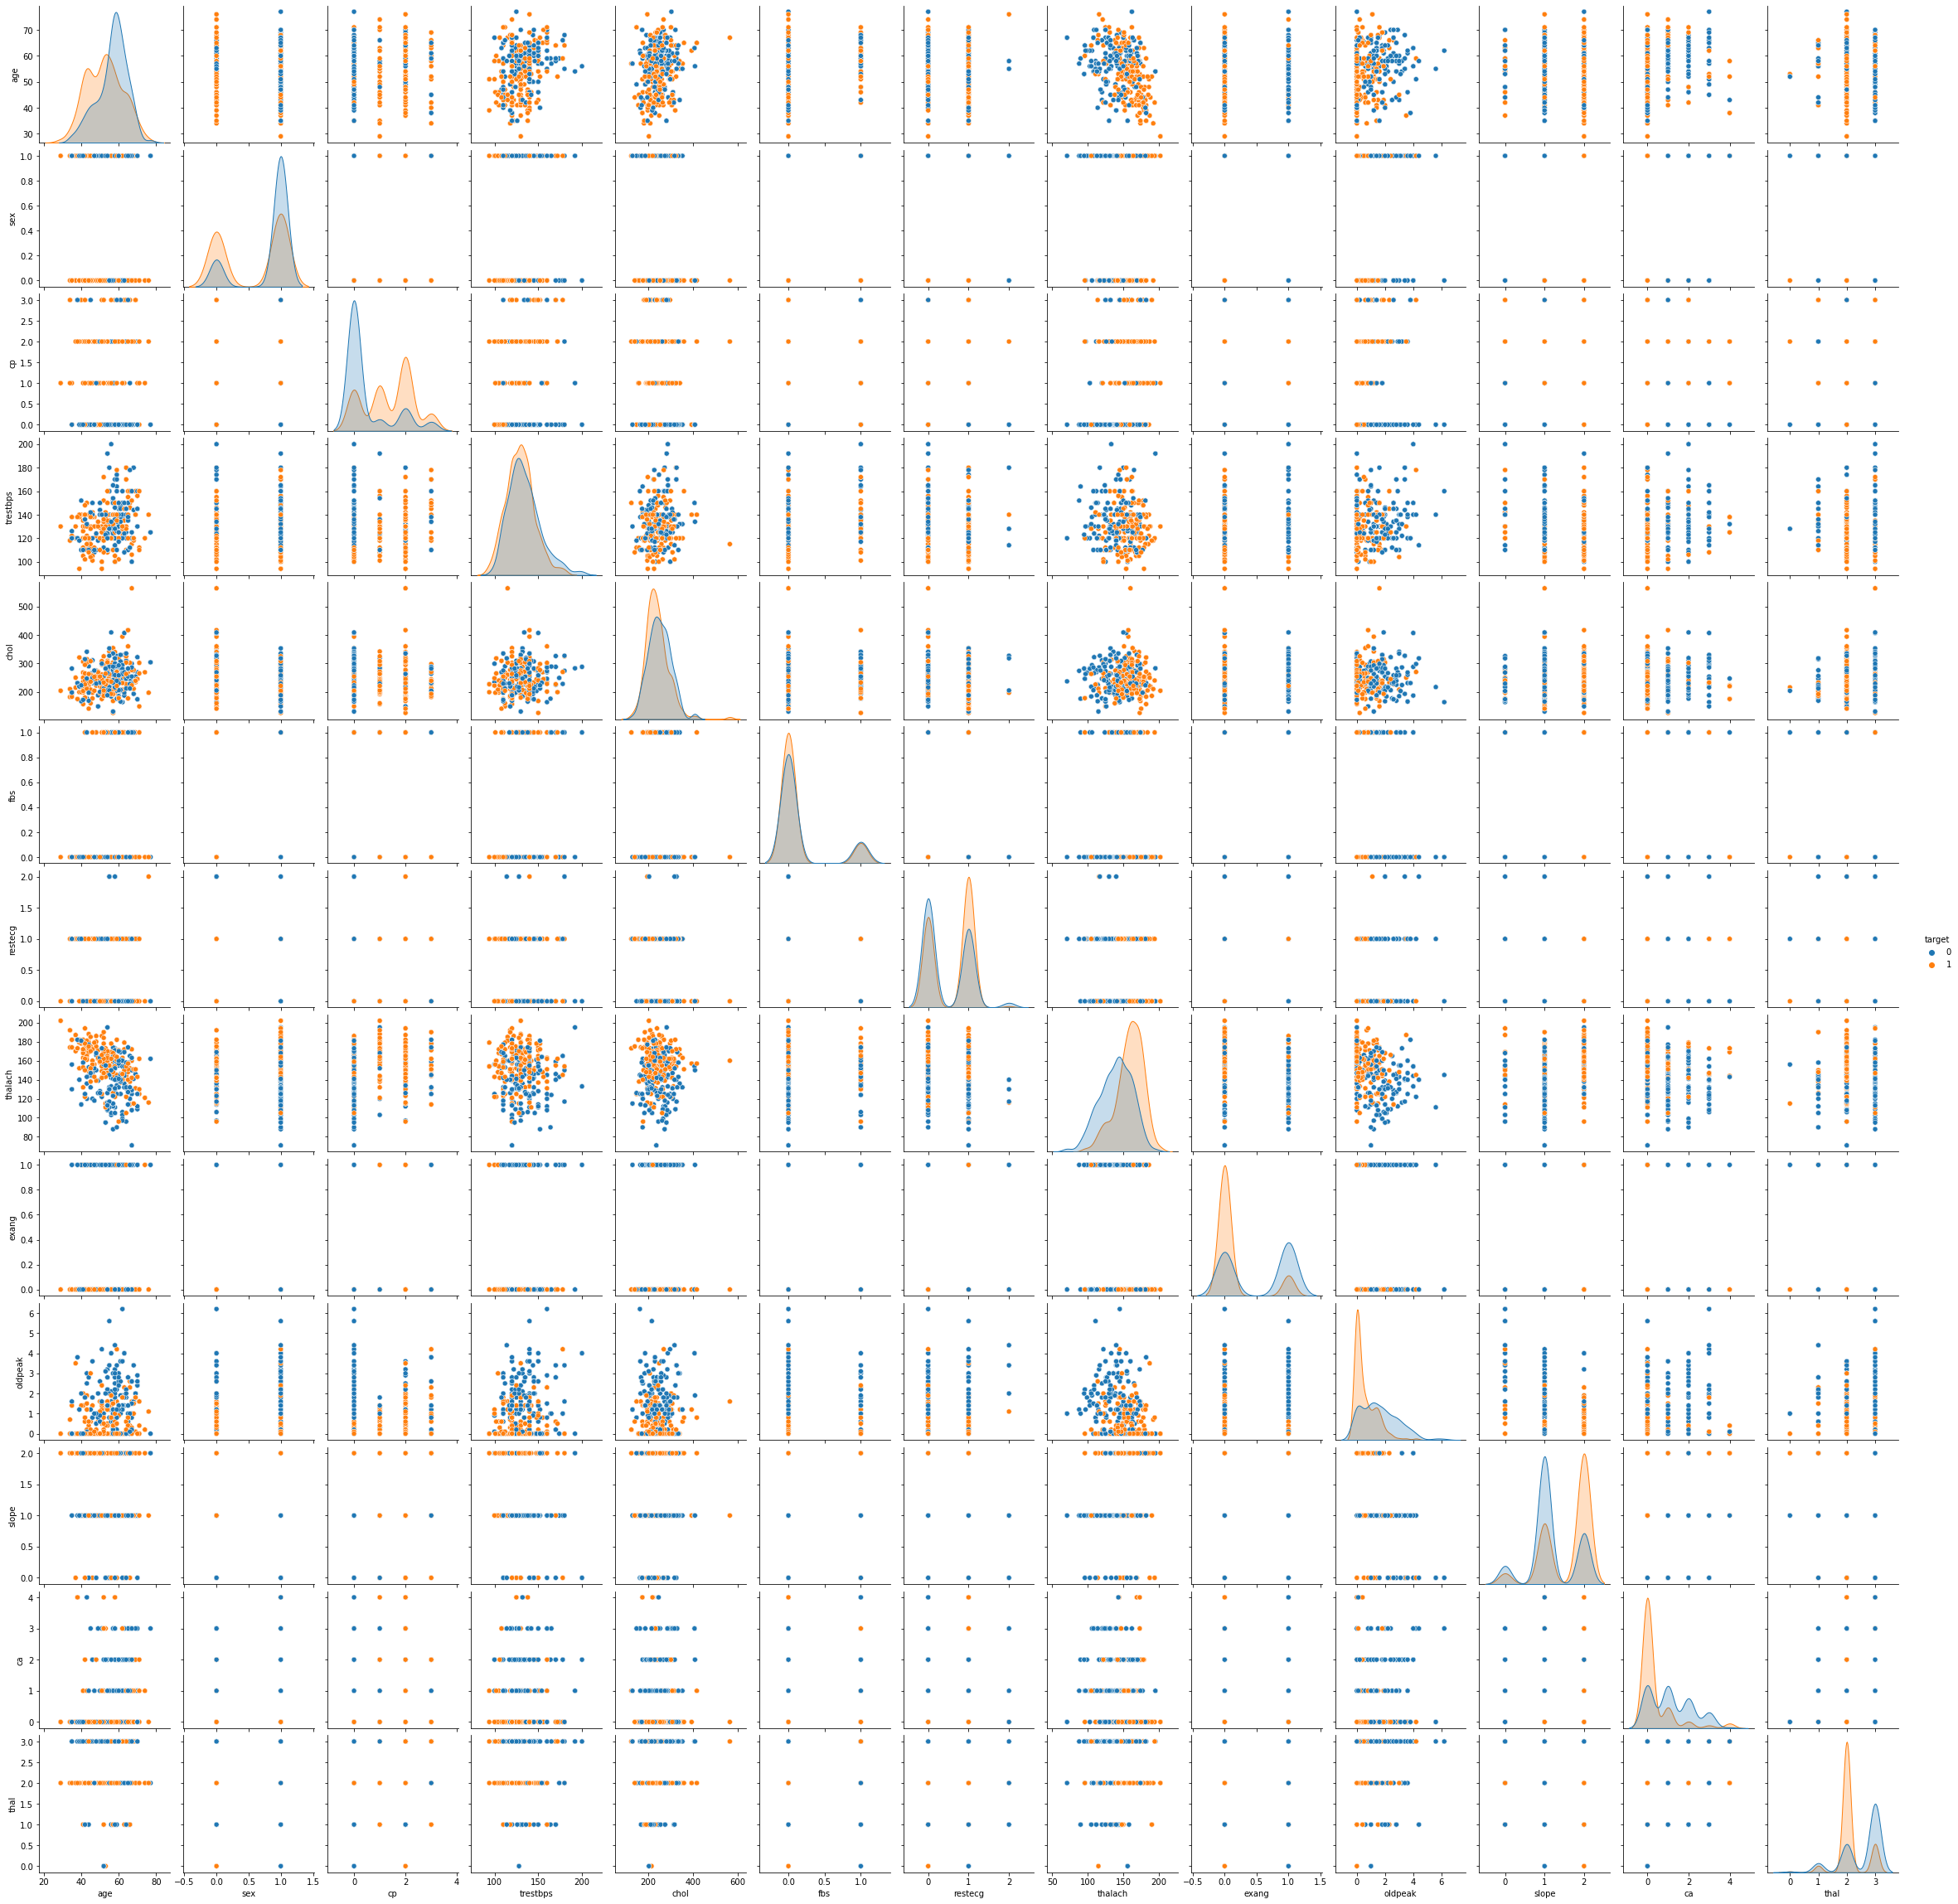

In [272]:
sns.pairplot(df, hue = 'target', vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'] );

* For checking the distribution of the dataset we will plot the density chart of each feature

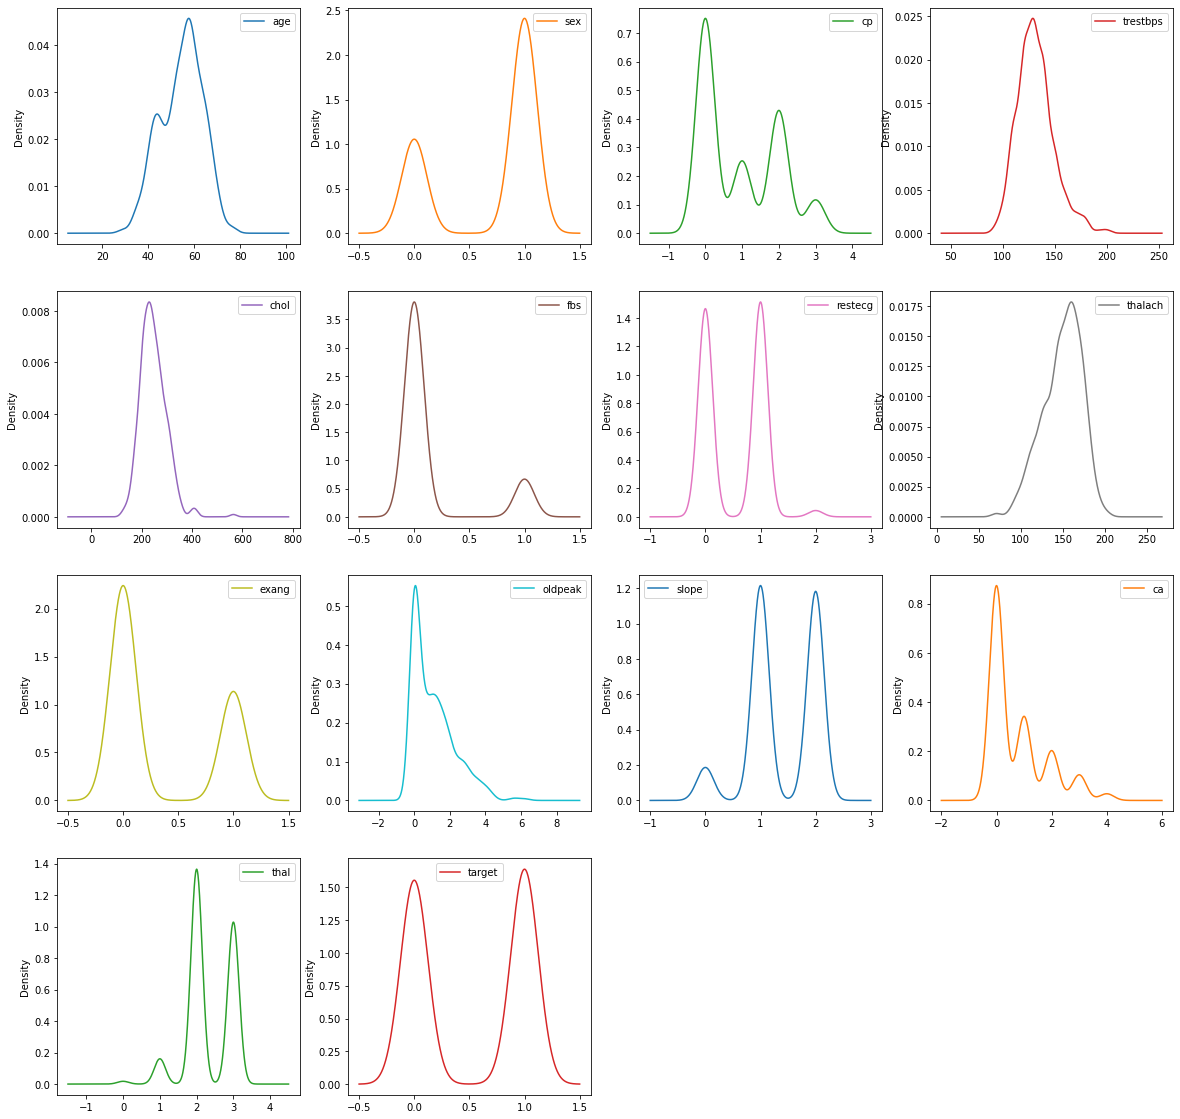

In [273]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

* To see the distribution of target :

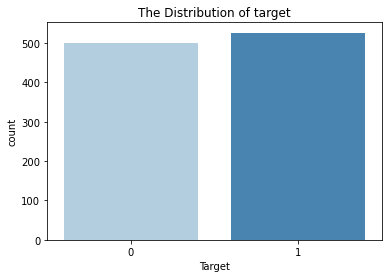

In [274]:
sns.countplot(x="target", data=df, palette="Blues")
plt.title('The Distribution of target');
plt.xlabel("Target");
plt.show()

* Plotting the distribution of age in the data

In [275]:
ff.create_distplot([df[df.sex==0].age,df[df.sex==1].age],["Age of Females","Age of Males"])

* To see the ages, how many of them have heart disease, and how many of them have not (0=have not heart disease  ,1=have heart disease)

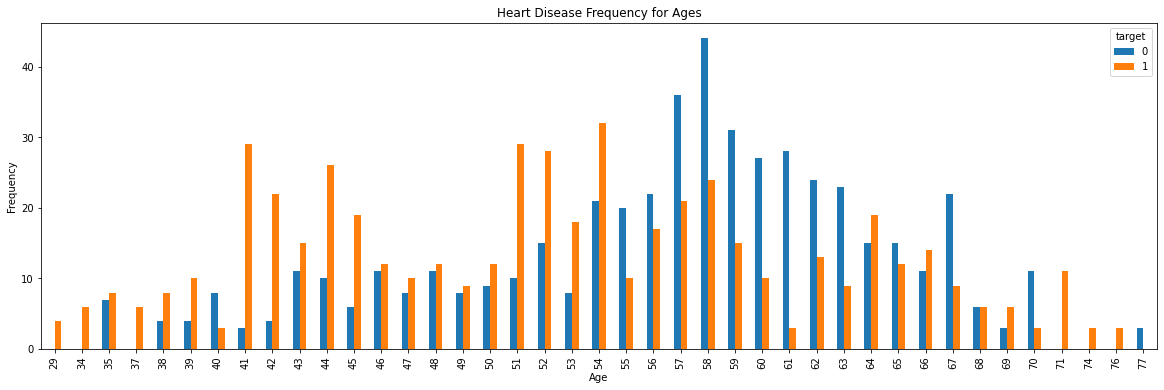

In [276]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* To see the distribution of sex :

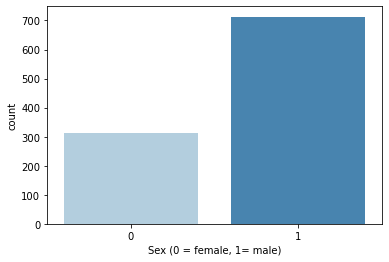

In [277]:
sns.countplot(x='sex', data=df, palette="Blues")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

* Plotting Heart Disease Frequency for Sex :

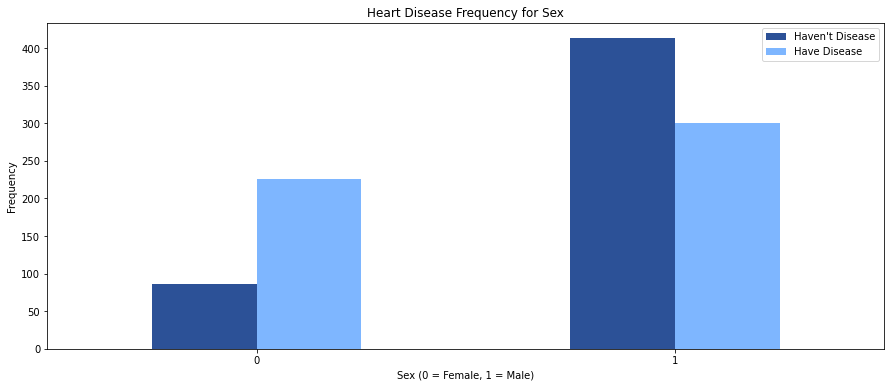

In [278]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#2C5197','#7EB6FF' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

* Plotting Heart Disease Frequency for Slope :

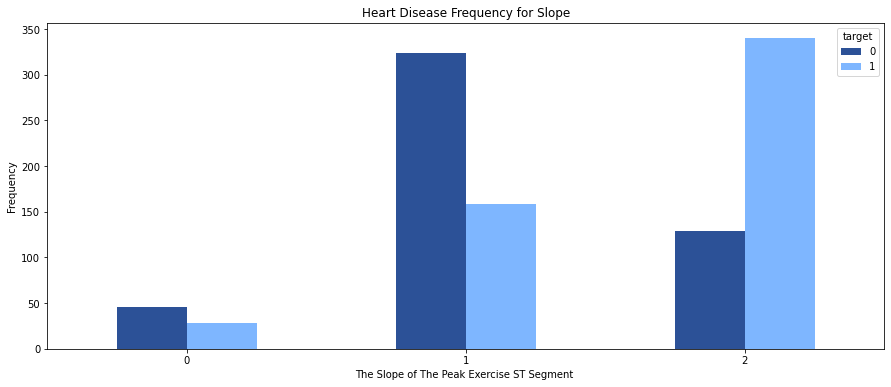

In [279]:
# To see all patients based on sloap
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#2C5197','#7EB6FF' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

* Plotting Heart Disease Frequency According To FBS :

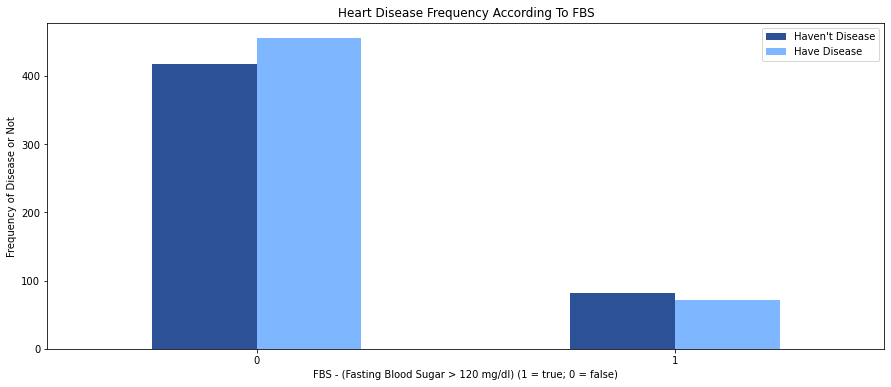

In [280]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#2C5197','#7EB6FF' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

* Plotting the data using Scatter plot : X=Age , Y=thalach

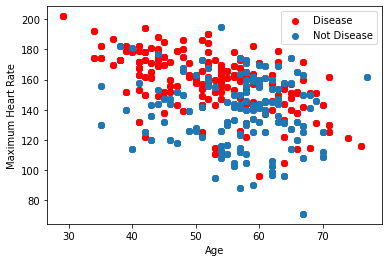

In [281]:
# Scatter plot Maximum Heart Rate
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

* Plotting Heart Disease Frequency According To Chest Pain Type :

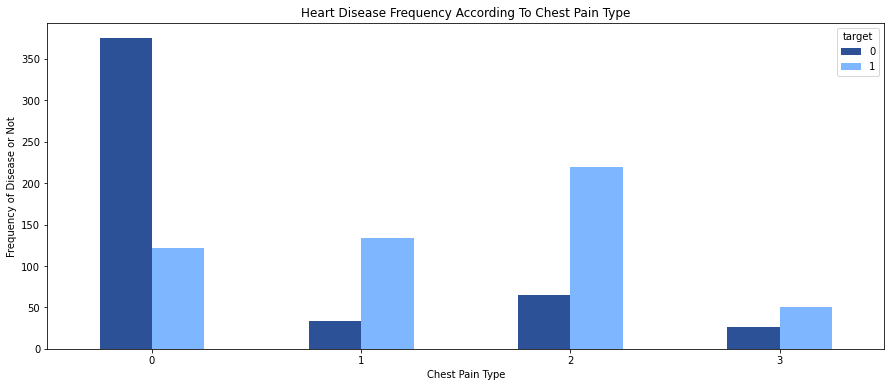

In [282]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#2C5197','#7EB6FF' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [283]:
#looking at the number of unique value of each column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [284]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [285]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

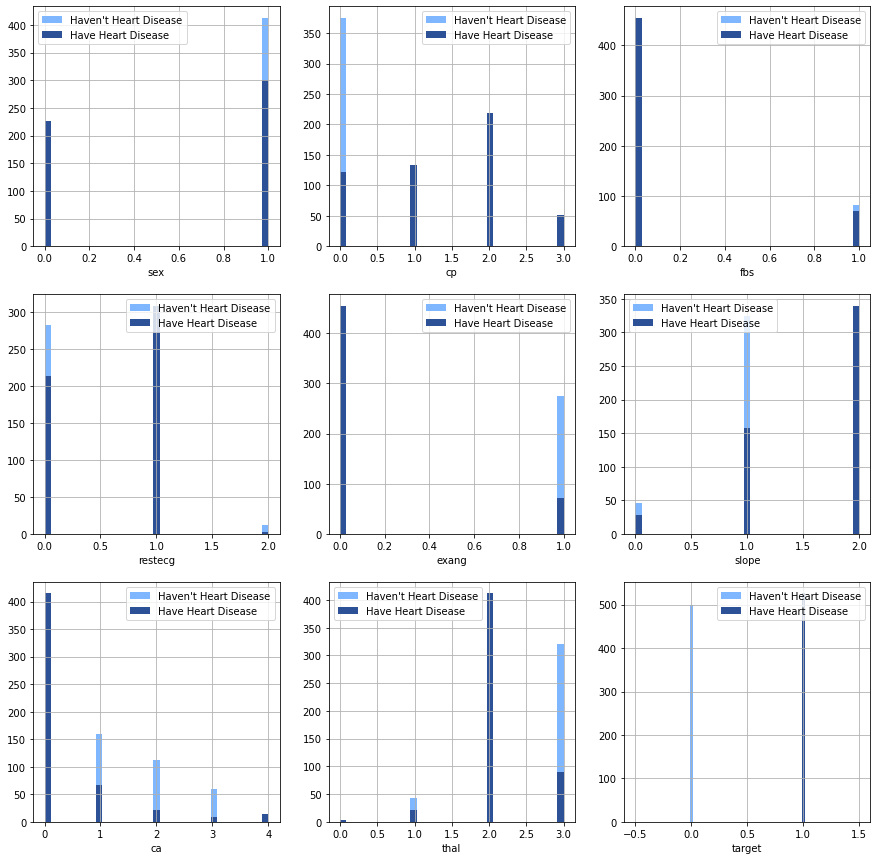

In [286]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='#7EB6FF', label="Haven't Heart Disease", alpha=1)
    df[df["target"] == 1][column].hist(bins=35, color='#2C5197', label="Have Heart Disease", alpha=1)
    plt.legend()
    plt.xlabel(column)

##### Observations from the above plot:

1- cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.


2- restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.


3- exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)


4- slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).


5- ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.


6- thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

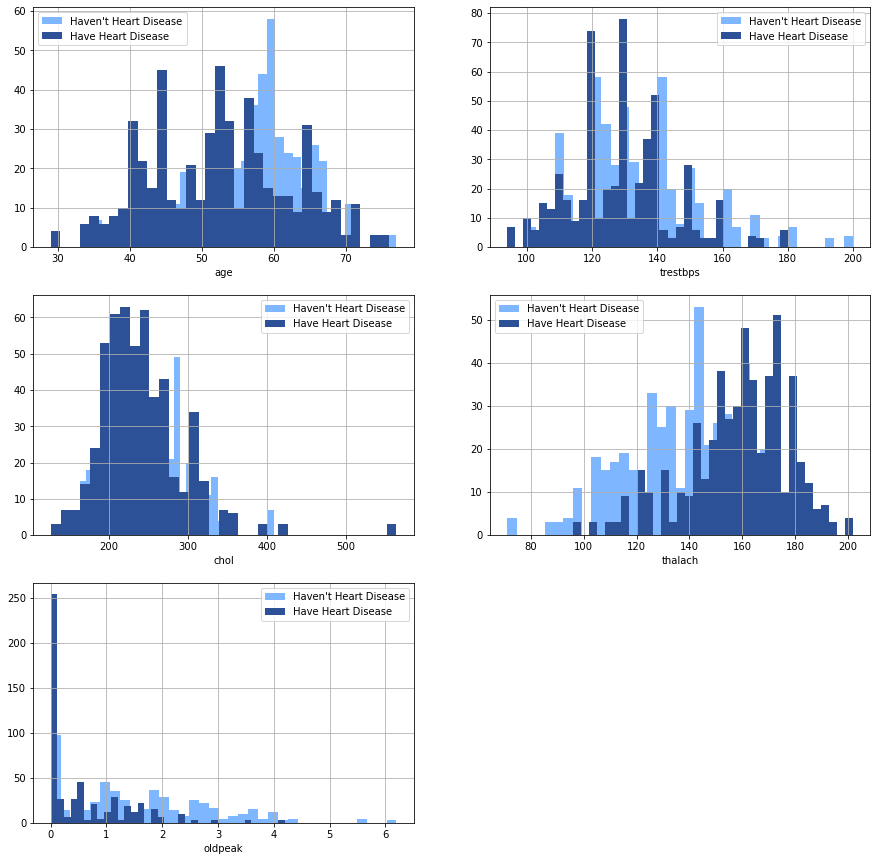

In [287]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='#7EB6FF', label="Haven't Heart Disease", alpha=1)
    df[df["target"] == 1][column].hist(bins=35, color='#2C5197', label="Have Heart Disease", alpha=1)
    plt.legend()
    plt.xlabel(column)

###### Observations from the above plot:

1- trestbps: resting blood pressure anything above 130-140 is generally of concern.


2- chol: greater than 200 is of concern.


3- thalach: People with a maximum of over 140 are more likely to have heart disease.


4- the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

In [288]:
ND=df[df.target==0].shape[0]
D=df[df.target==1].shape[0]

Female_ND=df[(df.target==0) & (df.sex==0)].shape[0]/ND*100
Male_ND=df[(df.target==0) & (df.sex==1)].shape[0]/ND*100

Female_D=df[(df.target==1) & (df.sex==0)].shape[0]/D*100
Male_D=df[(df.target==1) & (df.sex==1)].shape[0]/D*100

In [289]:
labels = ["Male","Female"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[Male_D,Female_D], name="Heart Disease"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[Male_ND,Female_ND], name="No Heart Disease"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name",marker=dict(colors=['#2C5197', '#7EB6FF']))

fig.update_layout(
    title_text="Comparision of sex between Heart Disease patients and without it",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Disease', x=0.16, y=0.5, font_size=18, showarrow=False),
                 dict(text='No Disease', x=0.86, y=0.5, font_size=18, showarrow=False)])
fig.show()

- To see the outliers :

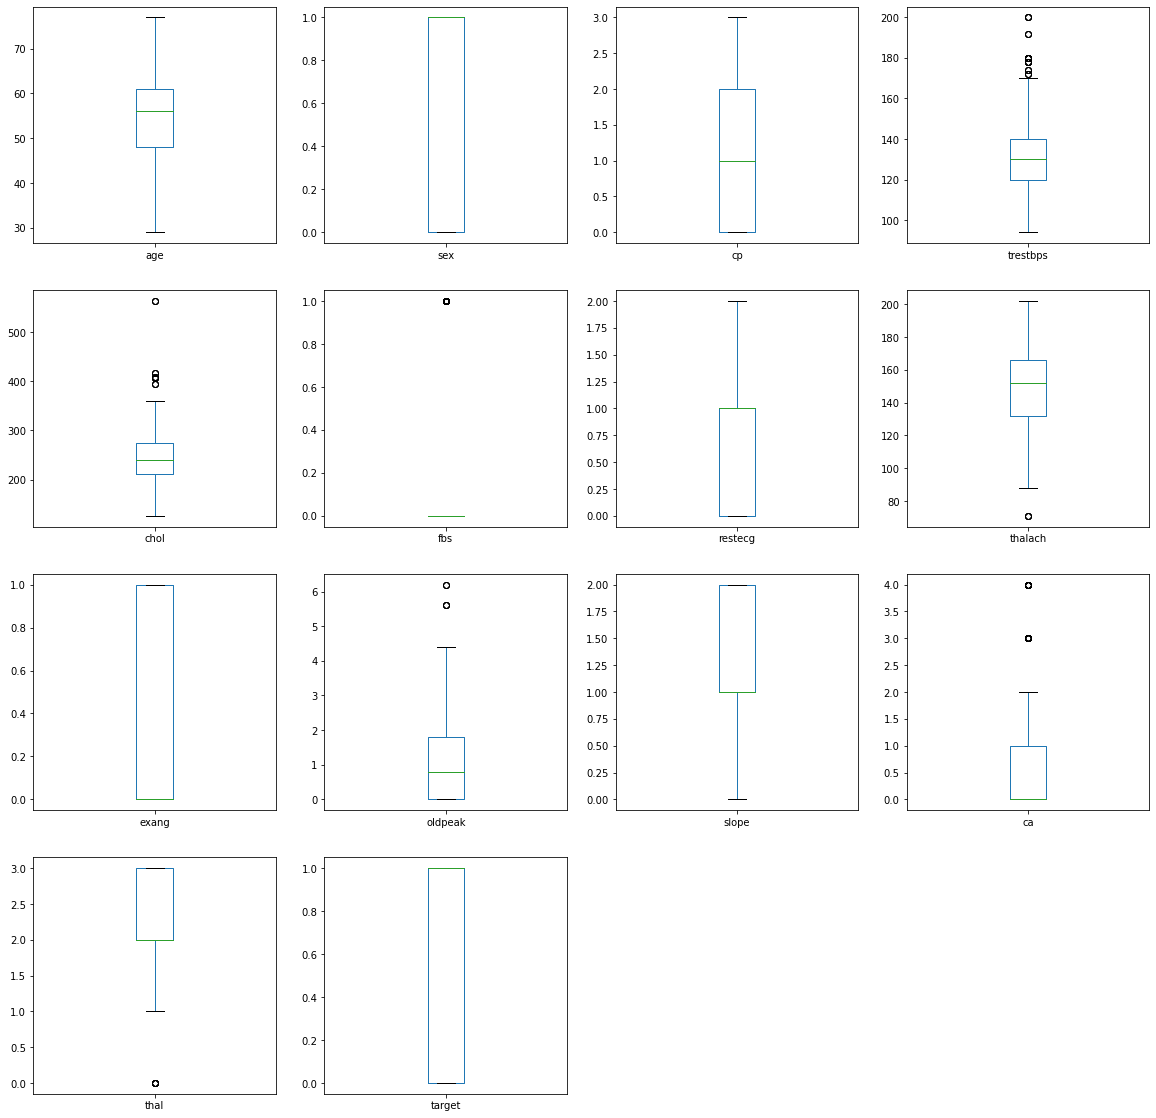

In [290]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

- This method is to handle the outliers by using the IQR :

In [291]:
def handle_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    mean=df.mean()
    df_new=df.map(lambda x:x if (x>= Q1 - 1.5 * IQR) & (x <= Q3 + 1.5 *IQR) else mean)
    return df_new

In [292]:
df["trestbps"]=handle_outlier_IQR(df['trestbps'])
df["chol"]=handle_outlier_IQR(df['chol'])
df["thalach"]=handle_outlier_IQR(df['thalach'])
df["oldpeak"]=handle_outlier_IQR(df['oldpeak'])

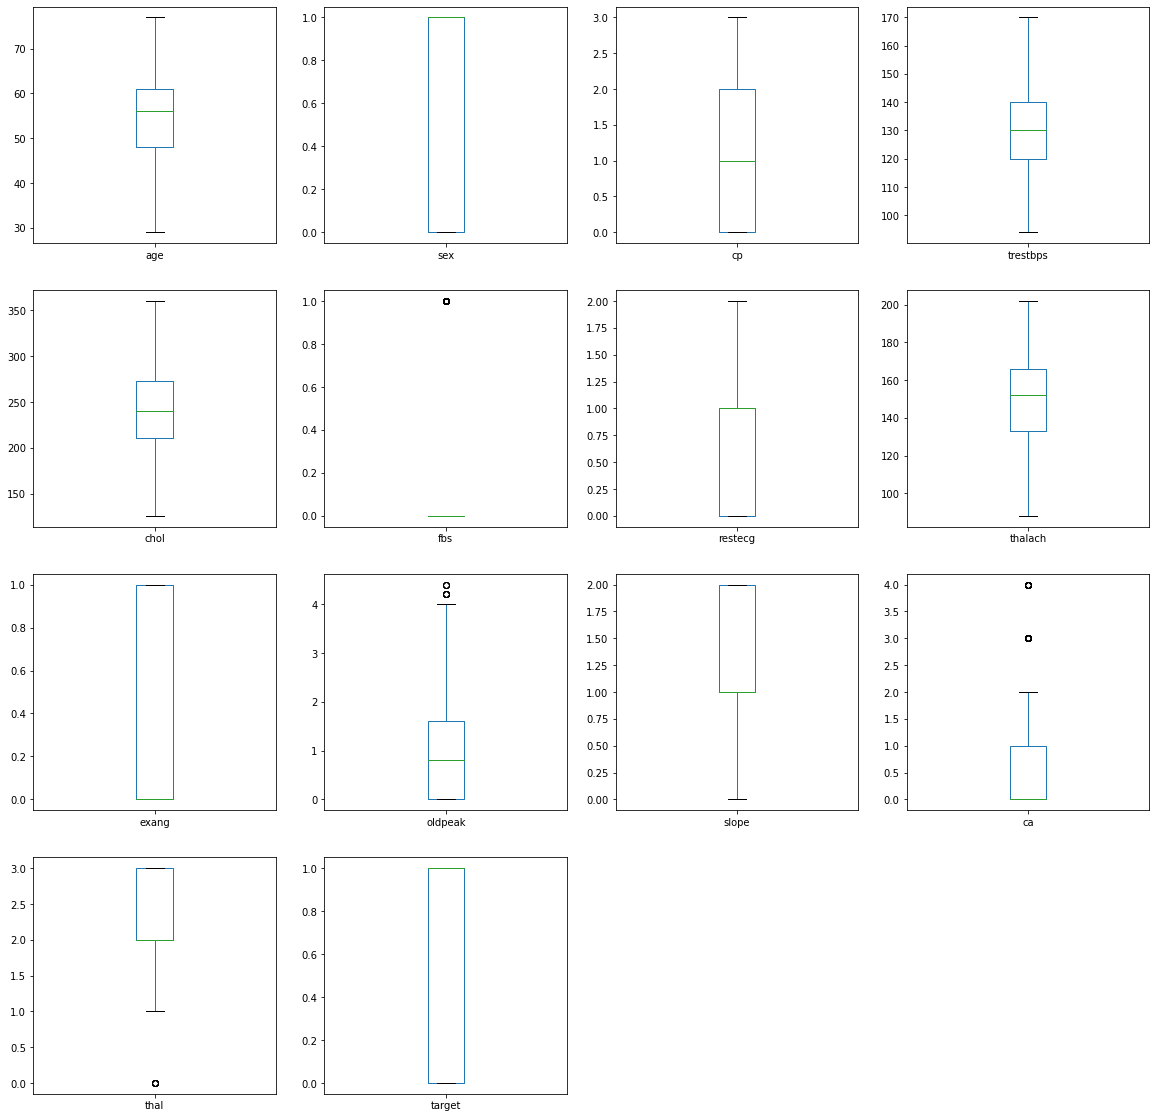

In [293]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

(14.5, -0.5)

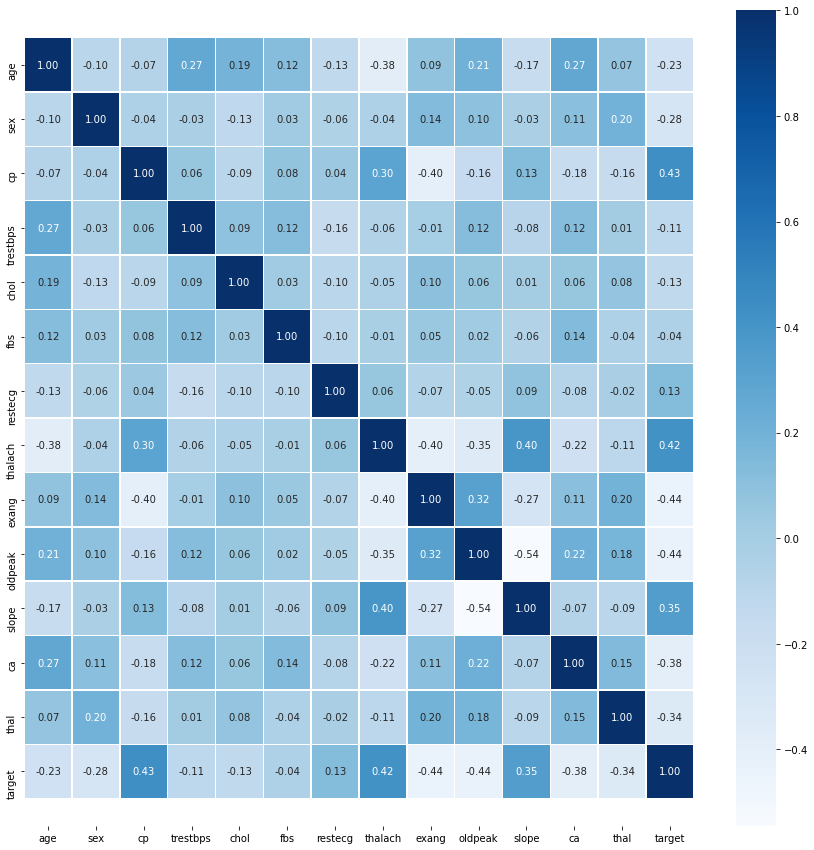

In [294]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

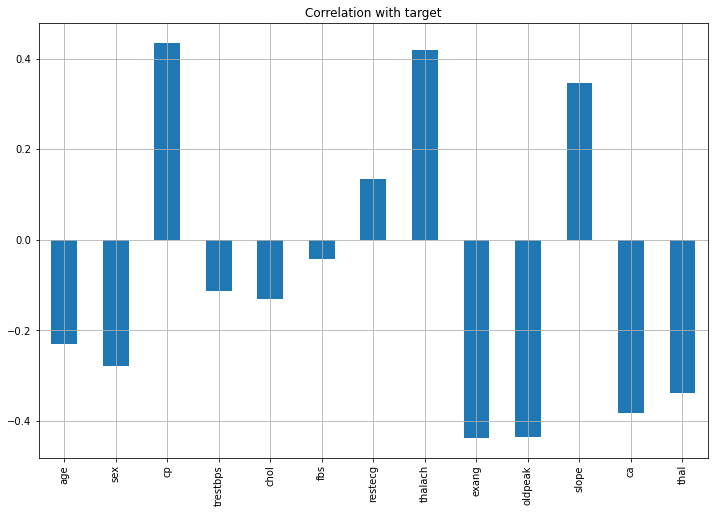

In [295]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target");

##### Observations from correlation:
1- fbs and chol are the least correlated with the target variable.


2- All other variables have a significant correlation with the target variable.

#### Data Processing

After exploring the dataset, we can observe that we need to convert some categorical variables to dummy variables and scale all values before training the machine learning models.

In [296]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [297]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

So, for this task, we will use the get_dummies method to create dummy columns for categorical variables:

In [298]:
y = df.target.values
x_data =df[continous_val]

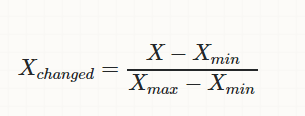

In [299]:
Image(filename='normalization.png')

In [300]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)
#normalizee()

In [450]:
dataset.tail().iloc[:,16:]


,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
1020,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
1021,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1022,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
1023,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
1024,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [449]:
rest=dataset.drop(['age','trestbps','chol','thalach','oldpeak','target'], axis='columns')
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
frames = [rest, x]
x = pd.concat(frames, axis = 1)

In [303]:
x.describe()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.304390,0.695610,0.484878,0.162927,0.277073,0.075122,0.850732,0.149268,0.484878,0.500488,...,0.017561,0.006829,0.062439,0.530732,0.400000,0.529878,0.475486,0.500129,0.538763,0.236098
std,0.460373,0.460373,0.500015,0.369479,0.447771,0.263717,0.356527,0.356527,0.500015,0.500244,...,0.131413,0.082397,0.242069,0.499298,0.490137,0.189006,0.198718,0.192439,0.197190,0.251290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.395833,0.342105,0.363248,0.394737,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.562500,0.473684,0.487179,0.561404,0.181818
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.666667,0.605263,0.628205,0.684211,0.363636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [446]:
x

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak
0,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0.479167,0.407895,0.367521,0.701754,0.227273
1,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0.500000,0.605263,0.329060,0.587719,0.704545
2,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0.854167,0.671053,0.205128,0.324561,0.590909
3,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0.666667,0.710526,0.329060,0.640351,0.000000
4,1,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0.687500,0.578947,0.717949,0.157895,0.431818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0.625000,0.605263,0.405983,0.666667,0.000000
1021,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0.645833,0.407895,0.564103,0.464912,0.636364
1022,0,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0.375000,0.210526,0.636752,0.263158,0.227273
1023,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0.437500,0.210526,0.547009,0.622807,0.000000


We will split our data. 70% of our data will be train data and 30% of it will be test data.

In [304]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state=0)

In [305]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

## 3-Build a Classification Model

In [306]:
accuracies = {}

In [385]:
precisions ={}

In [404]:
recalls ={}

### Creating Model for Logistic Regression

In [307]:
## How to optimize hyper-parameters of a Logistic Regression model using Grid Search in Python
def Snippet_145(): 
    print(format('How to optimize hyper-parameters of a LR model using Grid Search in Python','*^82'))       
    
    # Create an scaler object
    sc = StandardScaler()
    
    # Create a pca object
    pca = decomposition.PCA()
    
    # Create a logistic regression object with an L2 penalty
    logistic = linear_model.LogisticRegression()
    
    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a logistic regression on the data.
    pipe = Pipeline(steps=[('sc', sc), 
                           ('pca', pca), 
                           ('logistic', logistic)])
    
    # Create Parameter Space
    # Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
    n_components = list(range(1,x_train.T.shape[1]+1,1))
    # Create a list of values of the regularization parameter
    C = np.logspace(-4, 4, 50)
    # Create a list of options for the regularization penalty
    penalty = ['l1', 'l2']
    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
    parameters = dict(pca__n_components=n_components, 
                      logistic__C=C,
                      logistic__penalty=penalty)
    
    # Conduct Parameter Optmization With Pipeline
    # Create a grid search object
    clf = GridSearchCV(pipe, parameters)
    
    # Fit the grid search
    clf.fit(x_train.T, y_train)
    # View The Best Parameters
    print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
    print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
    #print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf.best_estimator_.get_params()['logistic'])    
    
Snippet_145()

****How to optimize hyper-parameters of a LR model using Grid Search in Python****
Best Penalty: l2
Best C: 0.08685113737513521

LogisticRegression(C=0.08685113737513521)


In [308]:
lr = LogisticRegression(C=0.087,penalty='l2')
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = np.round(acc,2)
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.83%


In [405]:
pred = lr.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Logistic Regression'] = np.round(precision,2)
recalls['Logistic Regression'] = np.round(recall,2)

In [309]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[162  27]
 [ 27 194]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       189
           1       0.88      0.88      0.88       221

    accuracy                           0.87       410
   macro avg       0.87      0.87      0.87       410
weighted avg       0.87      0.87      0.87       410



### Creating Model for K-Nearest Neighbour (KNN)

Let's see what will be score if we use KNN algorithm.

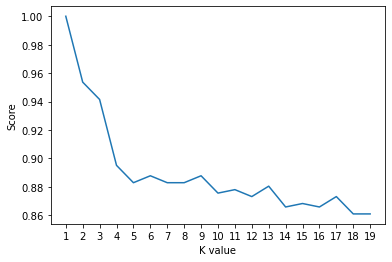

Maximum KNN Score is 100.00%


In [310]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = np.round(acc,2)
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 1 we will reach maximum score.

In [311]:
knn = KNeighborsClassifier(n_neighbors = 1)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 100.00%


In [406]:
pred = knn.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['KNN'] = np.round(precision,2)
recalls['KNN'] = np.round(recall,2)

In [312]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[189   0]
 [  0 221]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       221

    accuracy                           1.00       410
   macro avg       1.00      1.00      1.00       410
weighted avg       1.00      1.00      1.00       410



### Creating Model for Support Vector Machine (SVM)

Now we will use SVM algorithm.

In [375]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf','poly','sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
grid.fit(x_train.T, y_train.T)
# print best parameter after tuning
print(grid.best_params_)
 # print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [314]:
svm = SVC(random_state = 1, kernel='rbf', gamma=0.1, C=1000)
svm.fit(x_train.T, y_train.T)
acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = np.round(acc,2)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 100.00%


In [407]:
pred = grid.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['SVM'] = np.round(precision,2)
recalls['SVM'] = np.round(recall,2)

In [315]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[189   0]
 [  0 221]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       221

    accuracy                           1.00       410
   macro avg       1.00      1.00      1.00       410
weighted avg       1.00      1.00      1.00       410



### Creating Model for Naive Bayes

Now we will use Naive Bayes algorithm.

In [316]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = np.round(acc,2)
print("Accuracy of Naive Bayes: {:.2f}%".format(acc)) 

Accuracy of Naive Bayes: 85.12%


In [408]:
pred = nb.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Naive Bayes'] = np.round(precision,2)
recalls['Naive Bayes'] = np.round(recall,2)

In [317]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[155  34]
 [ 27 194]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       189
           1       0.85      0.88      0.86       221

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



### Creating Model for Decision Tree

Now we will use Decision Tree Algorithm.

In [344]:
## How to optimize hyper-parameters of a DecisionTree model using Grid Search in Python
def optimize_DT(): 
    print()
    print(format('How to optimize hyper-parameters of a DT model using Grid Search in Python','*^82'))   
  
    # Create an scaler object
    sc = StandardScaler()
    
    # Create a pca object
    pca = decomposition.PCA()
    
    # Create a logistic regression object with an L2 penalty
    decisiontree = tree.DecisionTreeClassifier()
    
    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a Decision Tree Classifier on the data.
    pipe = Pipeline(steps=[('sc', sc), 
                           ('pca', pca), 
                           ('decisiontree', decisiontree)])
    
    # Create Parameter Space
    # Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
    n_components = list(range(1,x_train.T.shape[1]+1,1))
    
    # Create lists of parameter for Decision Tree Classifier
    criterion = ['gini', 'entropy']
    max_depth = [4,6,8,12]
    
    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
    parameters = dict(pca__n_components=n_components, 
                      decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)
    
    # Conduct Parameter Optmization With Pipeline
    # Create a grid search object
    clf = GridSearchCV(pipe, parameters)
    
    # Fit the grid search
    clf.fit(x_train.T, y_train)
    
    # View The Best Parameters
    print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
    print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
    #print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf.best_estimator_.get_params()['decisiontree'])
 
    
optimize_DT()


****How to optimize hyper-parameters of a DT model using Grid Search in Python****
Best Criterion: entropy
Best max_depth: 12

DecisionTreeClassifier(criterion='entropy', max_depth=12)


In [342]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=12)
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 97.80%


In [409]:
pred = dtc.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Decision Tree'] = np.round(precision,2)
recalls['Decision Tree'] = np.round(recall,2)

In [343]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[189   0]
 [  9 212]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       189
           1       1.00      0.96      0.98       221

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410



### Creating Model for Random Forest

Now we will use Random Forest Algorithm.

In [320]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,3000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [321]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train.T, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000, 2200, 2400,
                                                         2600, 2800]},
                   random_state=42, verbose=2)

In [322]:
rf_random.best_params_

{'n_estimators': 2400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [323]:
rf = RandomForestClassifier(n_estimators= 1200,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 100,
 bootstrap= True, random_state = 0)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.27%


In [410]:
pred = rf.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Random Forest'] = np.round(precision,2)
recalls['Random Forest'] = np.round(recall,2)

In [324]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[186   3]
 [  0 221]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       189
           1       0.99      1.00      0.99       221

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



### Creating Model for XGBoost

Now we will use XGBoost Algorithm.

In [325]:
xb = XGBClassifier(random_state=0)
xb.fit(x_train.T, y_train.T)

acc = xb.score(x_test.T, y_test.T)*100
accuracies['XGBoost'] = acc
print("XGBoost Accuracy {:.2f}%".format(acc));

[15:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy 99.27%


In [411]:
pred = xb.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['XGBoost'] = np.round(precision,2)
recalls['XGBoost'] = np.round(recall,2)

In [326]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[189   0]
 [  3 218]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       1.00      0.99      0.99       221

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



### Creating Model for Gradient Boosting

Now we will use Gradient Boosting Algorithm.

In [327]:
gbc = GradientBoostingClassifier()
parameters = {"n_estimators":[5,50,250,500],"max_depth":[1,3,5,7,9],"learning_rate":[0.01,0.1,1,10,100]}

In [328]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(x_train.T, y_train.T)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [329]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [330]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


0.715 + or -0.05 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.793 + or -0.053 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.844 + or -0.021 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.844 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.842 + or -0.032 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.844 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.889 + or -0.02 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.917 + or -0.025 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.899 + or -0.023 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.911 + or -0.035 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.953 + or -0.019 for the {'learning_rate': 0.01, 'max_dep

In [331]:
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=3, n_estimators=500)
gb.fit(x_train.T, y_train.T)
acc = gb.score(x_test.T, y_test.T)*100
accuracies['Gradient Boosting'] = acc
print("GradientBoosting Accuracy {:.2f}%".format(acc))

GradientBoosting Accuracy 99.27%


In [412]:
pred = gb.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Gradient Boosting'] = np.round(precision,2)
recalls['Gradient Boosting'] = np.round(recall,2)

In [332]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[186   3]
 [  0 221]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       189
           1       0.99      1.00      0.99       221

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



### Creating Model for GaussianNB

Now we will use GaussianNB algorithm.

In [333]:
gnb = GaussianNB()
gnb.fit(x_train.T, y_train.T)

acc = gnb.score(x_test.T, y_test.T)*100
accuracies['GaussianNB'] = acc
print("GaussianNB Accuracy {:.2f}%".format(acc))

GaussianNB Accuracy 85.12%


In [413]:
pred = gnb.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['GaussianNB'] = np.round(precision,2)
recalls['GaussianNB'] = np.round(recall,2)

In [334]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[155  34]
 [ 27 194]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       189
           1       0.85      0.88      0.86       221

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



### Creating Model for Linear Discriminant Analysis

Now we will use Linear Discriminant Analysis Algorthim.

In [335]:
lda = GaussianNB()
lda.fit(x_train.T, y_train.T)

acc = lda.score(x_test.T, y_test.T)*100
accuracies['Linear Discriminant Analysis'] = acc
print("Linear Discriminant Analysis Accuracy {:.2f}%".format(acc))

Linear Discriminant Analysis Accuracy 85.12%


In [414]:
pred = lda.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Linear Discriminant Analysis'] = np.round(precision,2)
recalls['Linear Discriminant Analysis'] = np.round(recall,2)

In [336]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[155  34]
 [ 27 194]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       189
           1       0.85      0.88      0.86       221

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



### Creating Model for Extra Trees Classifier

Now we will use Extra Trees Classifier

In [337]:
etc = ExtraTreesClassifier()
etc.fit(x_train.T, y_train.T)

acc = etc.score(x_test.T, y_test.T)*100
accuracies['Extra Trees Classifier'] = acc
print("Extra Trees Classifier Accuracy {:.2f}%".format(acc))

Extra Trees Classifier Accuracy 100.00%


In [415]:
pred = etc.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Extra Trees Classifier'] = np.round(precision,2)
recalls['Extra Trees Classifier'] = np.round(recall,2)

In [338]:
print(confusion_matrix(y_test.T, pred))
print(classification_report(y_test.T, pred))

[[189   0]
 [  0 221]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       221

    accuracy                           1.00       410
   macro avg       1.00      1.00      1.00       410
weighted avg       1.00      1.00      1.00       410



### Creating Stacked model

In [347]:
models=[nb,dtc,lda]

In [357]:
stacked = StackingClassifier(classifiers=models, meta_classifier=LogisticRegression(), use_probas=False)

In [363]:
# training of stacked model
stacked.fit(x_train.T, y_train.T)

StackingClassifier(classifiers=[GaussianNB(),
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=12),
                                GaussianNB()],
                   meta_classifier=LogisticRegression())

In [365]:
# evaluating accuracy
acc_S = stacked.score(x_test.T, y_test.T)*100
accuracies['Stacked'] = acc_S
print("Stacked model Accuracy {:.2f}%".format(acc))

Stacked model Accuracy 97.80%


In [416]:
pred = stacked.predict(x_test.T)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='binary')
precisions['Stacked'] = np.round(precision,2)
recalls['Stacked'] = np.round(recall,2)

### Comparing Models

Now we will compare between all models which are :
* Logistic Regression
* KNN
* SVM
* Naive Bayes
* Decision Tree
* Random Forest
* XGBoost
* Gradient Boosting
* GaussianNB
* Linear Discriminant Analysis
* Extra Trees Classifier

In [366]:
classification_results = pd.DataFrame.from_dict(accuracies,orient='index',columns=['Accuracy'])

In [367]:
classification_results

,Accuracy
Logistic Regression,86.830000
KNN,100.000000
SVM,100.000000
Naive Bayes,85.120000
Decision Tree,97.804878
Random Forest,99.268293
XGBoost,99.268293
Gradient Boosting,99.268293
GaussianNB,85.121951
Linear Discriminant Analysis,85.121951


* Accuracies :

In [368]:
fig = px.bar(y=list(accuracies.values()),x=list(accuracies.keys()),color=list(accuracies.keys()),title="Comparision of Classification Models", labels={"x":"Model Name","y":"Accuracy %"})
fig.show()

* Precisions :

In [402]:
fig2 = px.bar(y=list(precisions.values()),x=list(precisions.keys()),color=list(precisions.keys()),title="Comparision of Classification Models", labels={"x":"Model Name","y":"Precision %"})
fig2.show()

In [417]:
fig2 = px.bar(y=list(recalls.values()),x=list(recalls.keys()),color=list(recalls.keys()),title="Comparision of Classification Models", labels={"x":"Model Name","y":"Recall %"})
fig2.show()

In [371]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

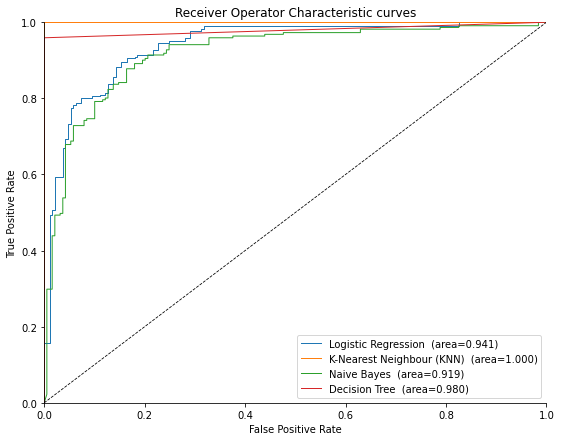

In [370]:
f, ax = plt.subplots(figsize=(9,7))

roc_auc_plot(y_test,lr.predict_proba(x_test.T),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,knn.predict_proba(x_test.T),label='K-Nearest Neighbour (KNN) ',l='-')
roc_auc_plot(y_test,nb.predict_proba(x_test.T),label='Naive Bayes ',l='-')
roc_auc_plot(y_test,dtc.predict_proba(x_test.T),label='Decision Tree ',l='-')
#roc_auc_plot(y_test,gb.predict_proba(x_test.T),label='Gradient Boosting ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

Our models work fine but best of them are KNN, Random Forest, XGBoost, Extra Trees Classifier and Decision Tree with 100.00% of accuracy.

### Confusion Matrix

Let's look their confusion matrixes.

In [353]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)
y_head_xb = xb.predict(x_test.T)
y_head_gb = gb.predict(x_test.T)
y_head_gnb = gnb.predict(x_test.T)
y_head_lda = lda.predict(x_test.T)
y_head_etc = etc.predict(x_test.T)

In [354]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_xb = confusion_matrix(y_test,y_head_xb)
cm_gb = confusion_matrix(y_test,y_head_gb)
cm_gnb = confusion_matrix(y_test,y_head_gnb)
cm_lda = confusion_matrix(y_test,y_head_lda)
cm_etc = confusion_matrix(y_test,y_head_etc)

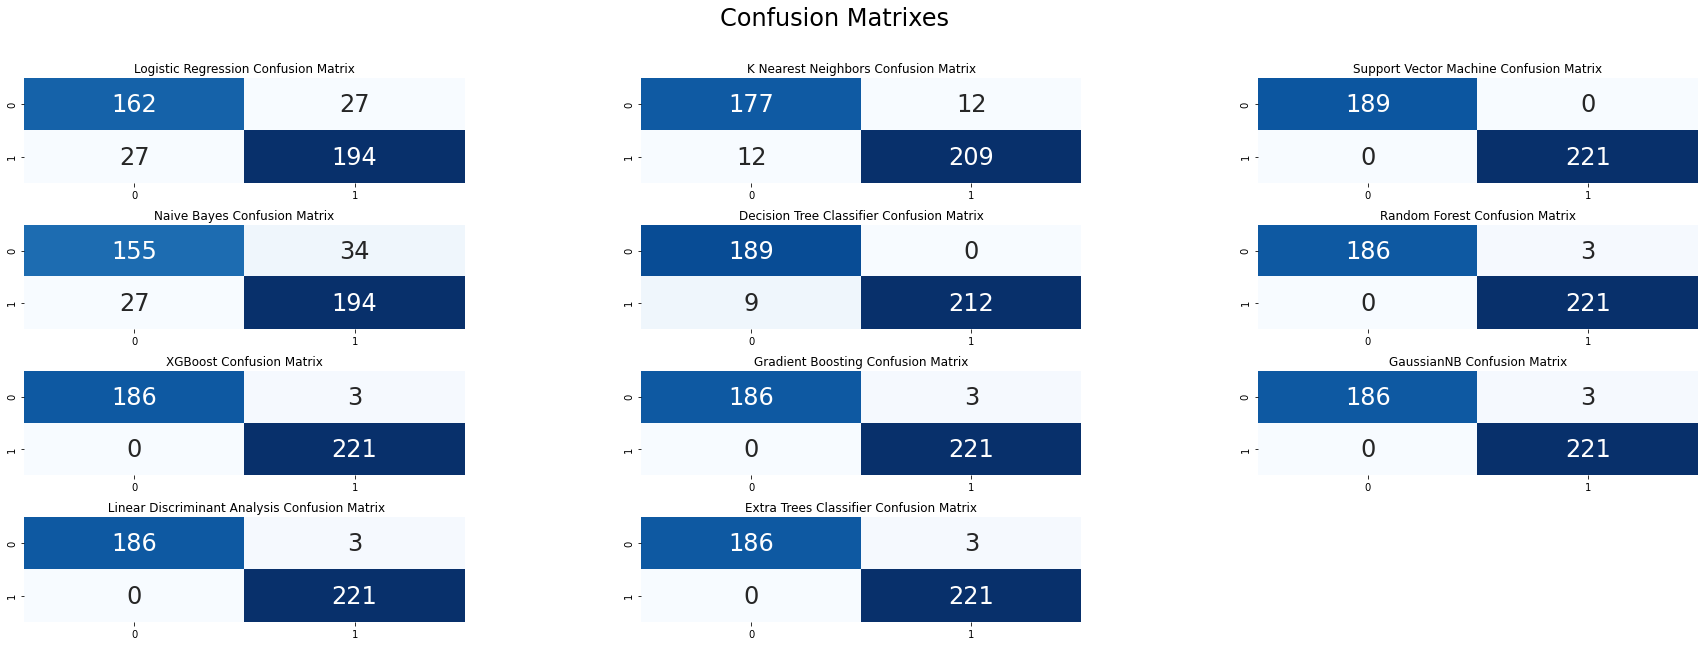

In [355]:
plt.figure(figsize=(30,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(4,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,7)
plt.title("XGBoost Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,8)
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,9)
plt.title("GaussianNB Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,10)
plt.title(" Linear Discriminant Analysis Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,11)
plt.title("Extra Trees Classifier Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [420]:
import pickle
with open('Model.pkl', 'wb') as file:
     pickle.dump(knn, file)